# SHAP Python Example

### Set Up

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import xgboost as xgb
import shap

np.random.seed(123)

### Simulating the Dataset

In [12]:
# Simulate data set for analysis
np.random.seed(123)
n = 10_000

square_feet = np.random.normal(2000, 500, n)
num_bedrooms = np.minimum(np.random.poisson(3, n) + 1, 6)
age_of_home = np.random.poisson(30, n)
distance_to_city_center = np.random.uniform(0, 30, n) # in miles
neighborhood_quality = np.random.normal(0, 1, n)

sale_price = 50 * square_feet + 8000 * num_bedrooms - 1000 * age_of_home + 20000 * np.sin(distance_to_city_center) + 100000 + np.random.normal(size=n)

df = pd.DataFrame({
    "square_feet": square_feet,
    "num_bedrooms": num_bedrooms,
    "age_of_home": age_of_home,
    "distance_to_city_center": distance_to_city_center,
    "neighborhood_quality": neighborhood_quality,
    "sale_price": sale_price
})


In [13]:
df.head()

,square_feet,num_bedrooms,age_of_home,distance_to_city_center,neighborhood_quality,sale_price
0,1457.184698,5,36,4.713291,-0.294945,156858.883180
1,2498.672723,4,31,7.783652,0.585701,245883.774708
2,2141.489249,2,25,16.164327,-0.101257,189260.479786
3,1246.852643,5,38,7.390978,-1.522174,182237.065545
4,1710.699874,4,34,24.786534,-0.328261,176746.166336


### Exploratory Plots

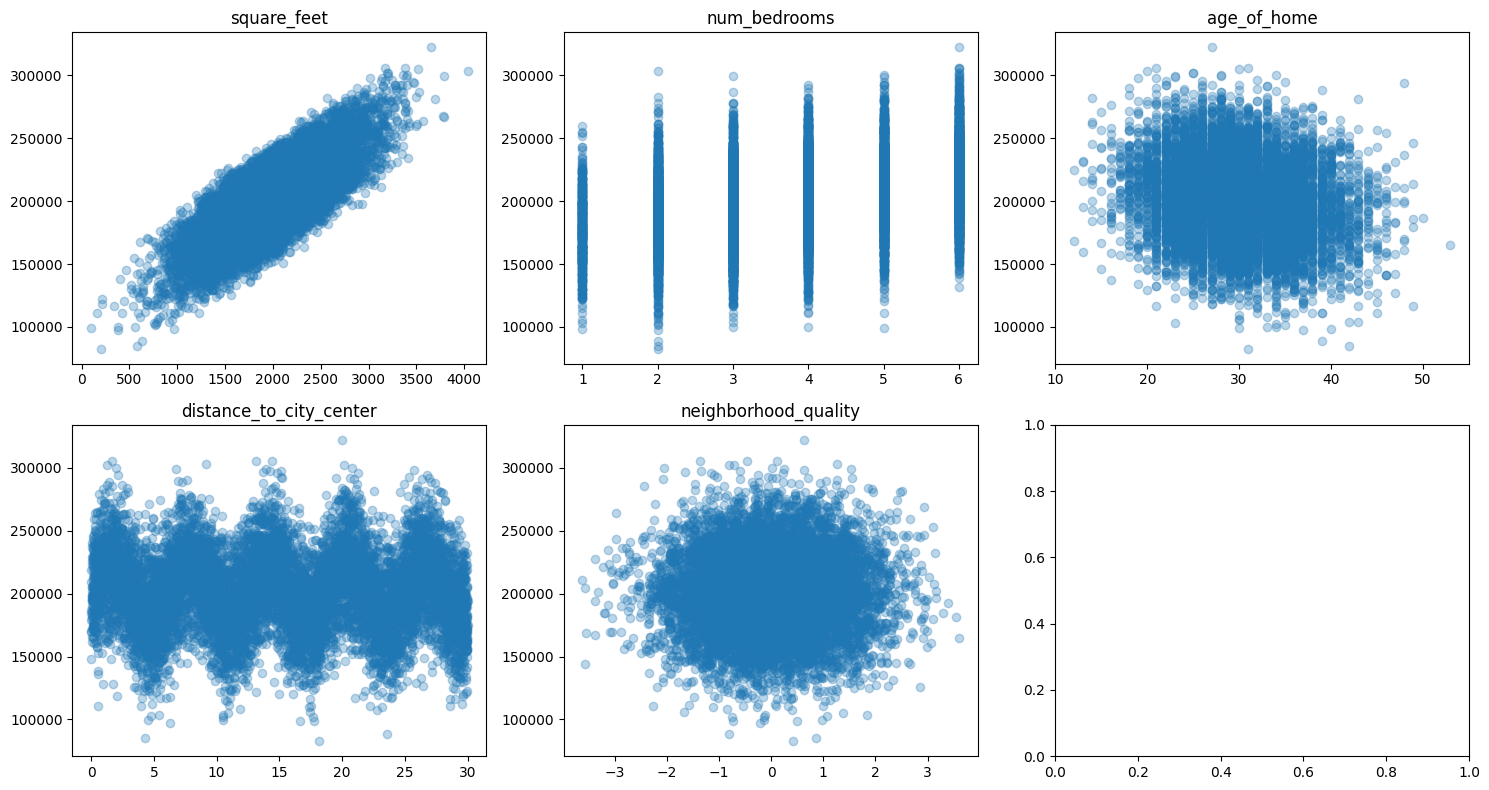

In [14]:
# Visually display the relationships between the features and the target
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(["square_feet", "num_bedrooms", "age_of_home", "distance_to_city_center", "neighborhood_quality"]):
    axes[i].scatter(df[col], df["sale_price"], alpha=0.3)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


### Linear Regression

In [15]:
# Train Linear Regression model
X = df.drop(columns="sale_price")
y = df["sale_price"]

lm = LinearRegression()
lm.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### SHAP for Linear Regression (KernelSHAP)

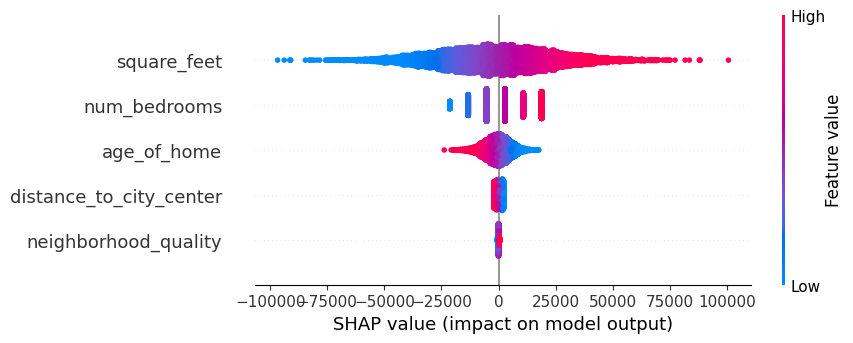

In [16]:
# Calculate SHAP values for linear regression model
explainer_lm = shap.Explainer(lm, X)
shap_values_lm = explainer_lm(X)

# SHAP Beeswarm plot
shap.plots.beeswarm(shap_values_lm)

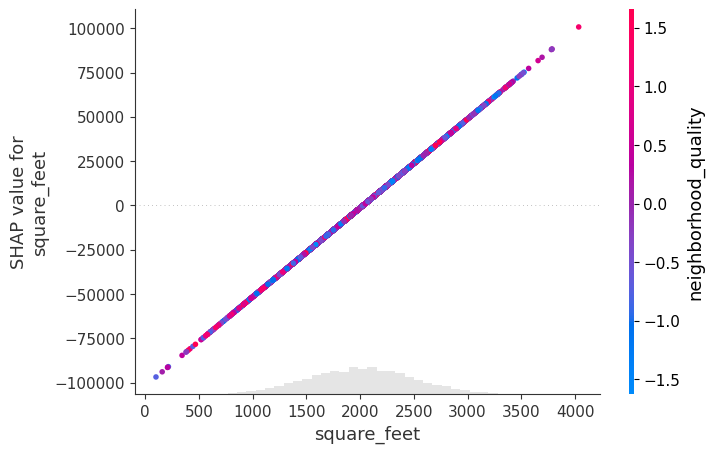

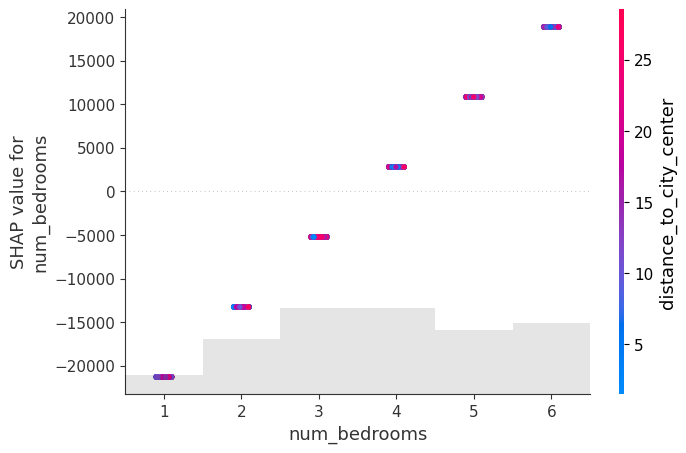

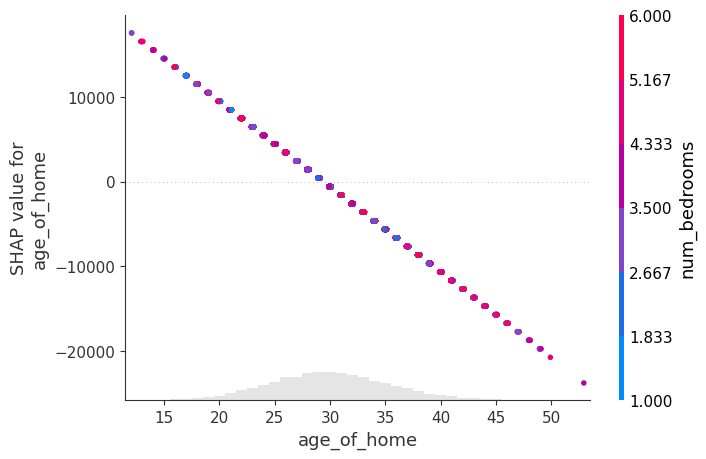

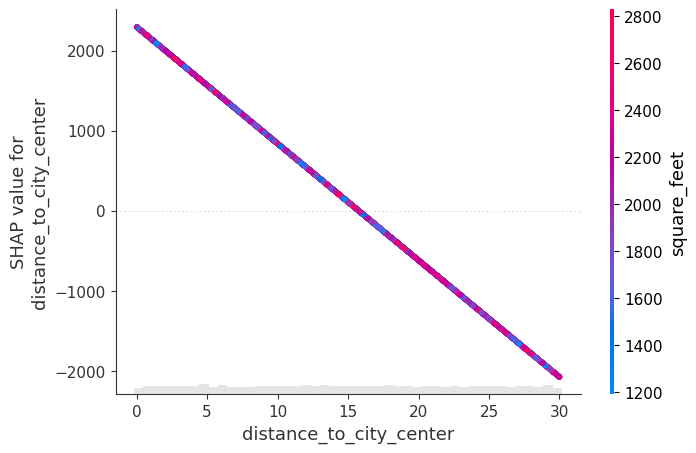

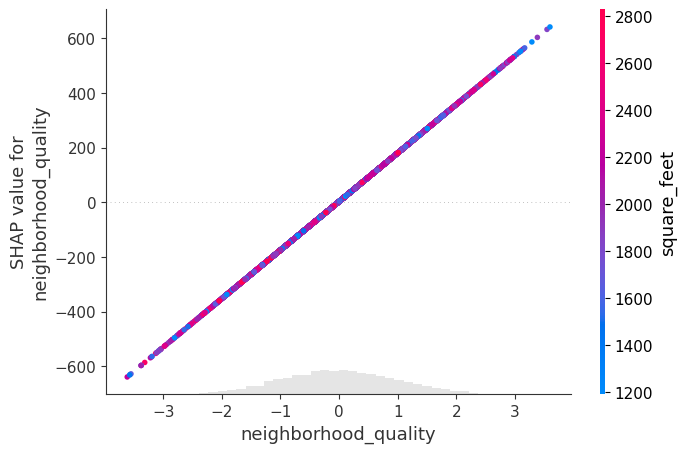

In [17]:
# SHAP Dependence plot
for feature in X.columns:
    shap.plots.scatter(shap_values_lm[:, feature], color=shap_values_lm)

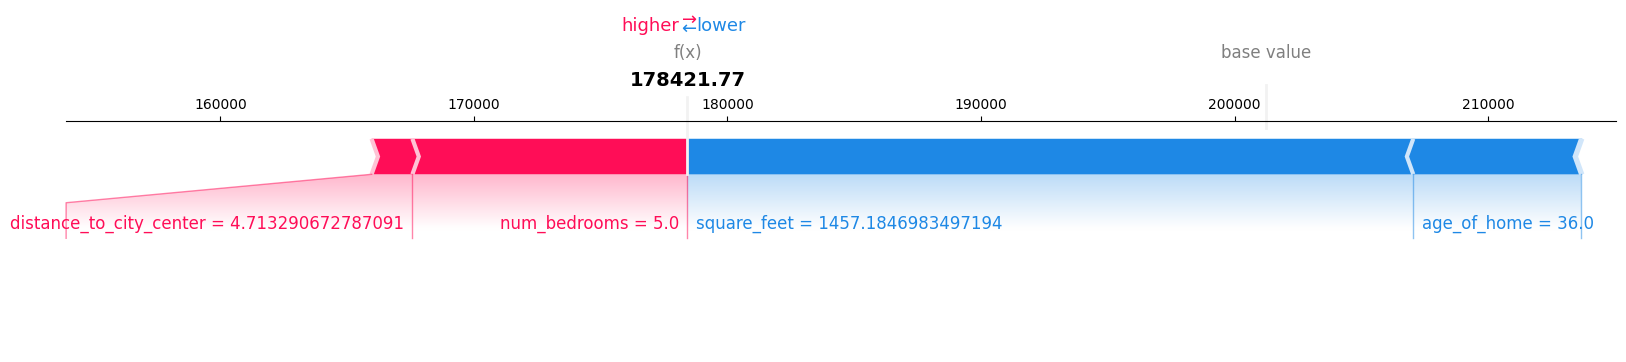

In [18]:
# SHAP Force plot for local explanation
shap.plots.force(
    explainer_lm.expected_value,
    shap_values_lm.values[0],
    X.iloc[0],
    matplotlib=True
)

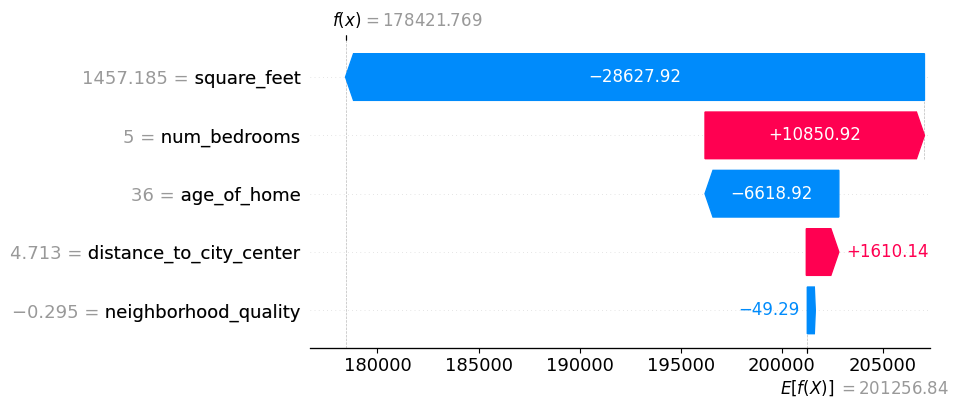

In [19]:
# SHAP Waterfall plot for local explanation
shap.plots.waterfall(shap_values_lm[0])

### XGBoost

In [20]:
# Train XGBoost model
dtrain = xgb.DMatrix(X, label=y)

params = {
    "objective": "reg:squarederror",
    "max_depth": 6,
    "eta": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,
    verbose_eval=False
)

### SHAP for XGBoost (TreeSHAP)

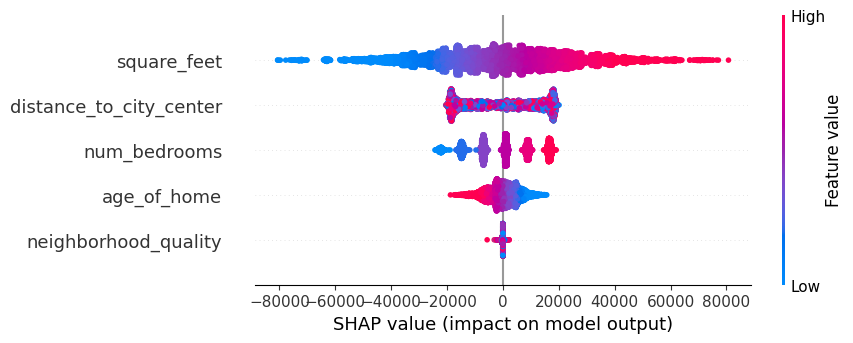

In [21]:
# Calculate SHAP values for XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb(X)

# SHAP Beeswarm plot
shap.plots.beeswarm(shap_values_xgb)

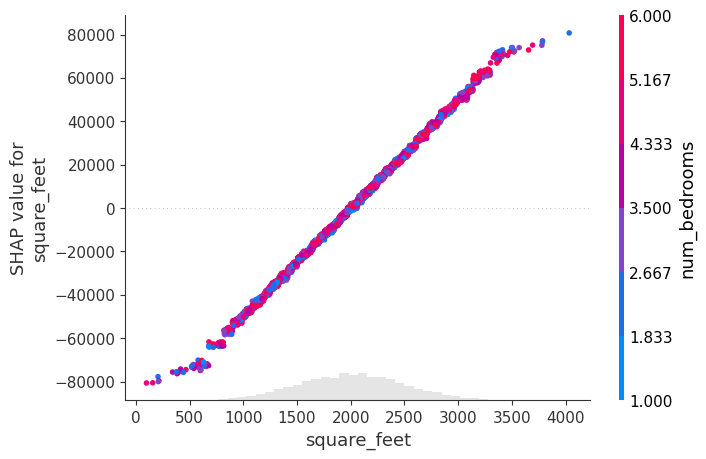

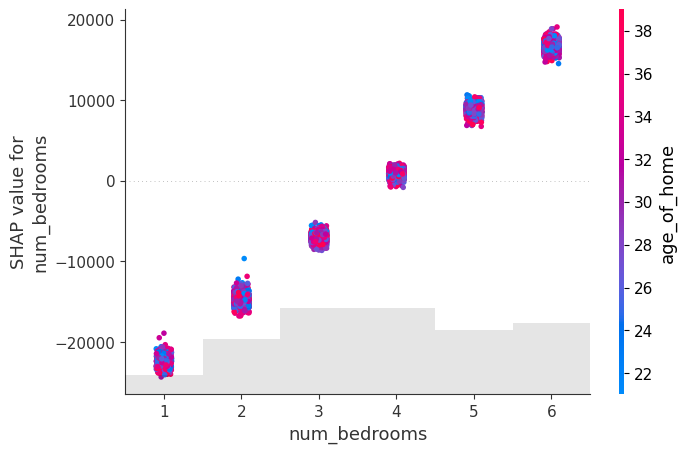

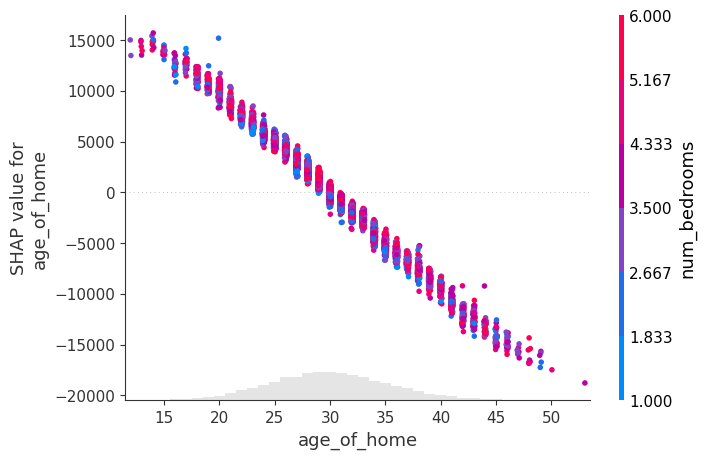

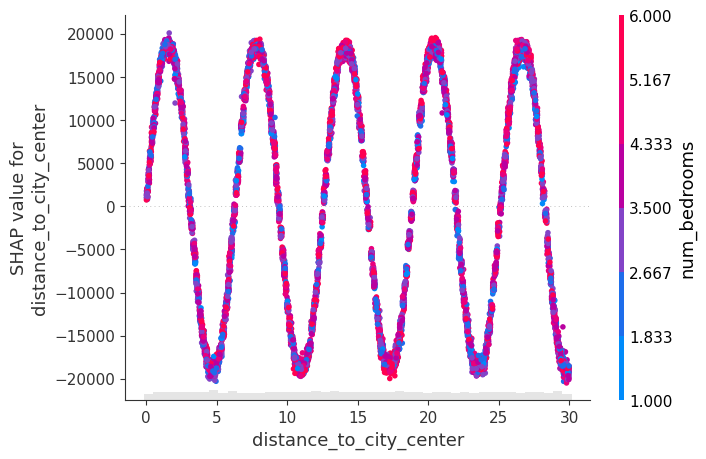

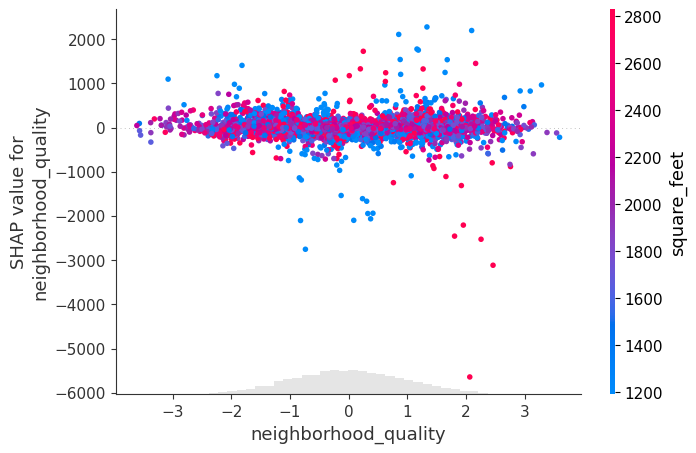

In [22]:
# SHAP Dependence plot
for feature in X.columns:
    shap.plots.scatter(shap_values_xgb[:, feature], color=shap_values_xgb)

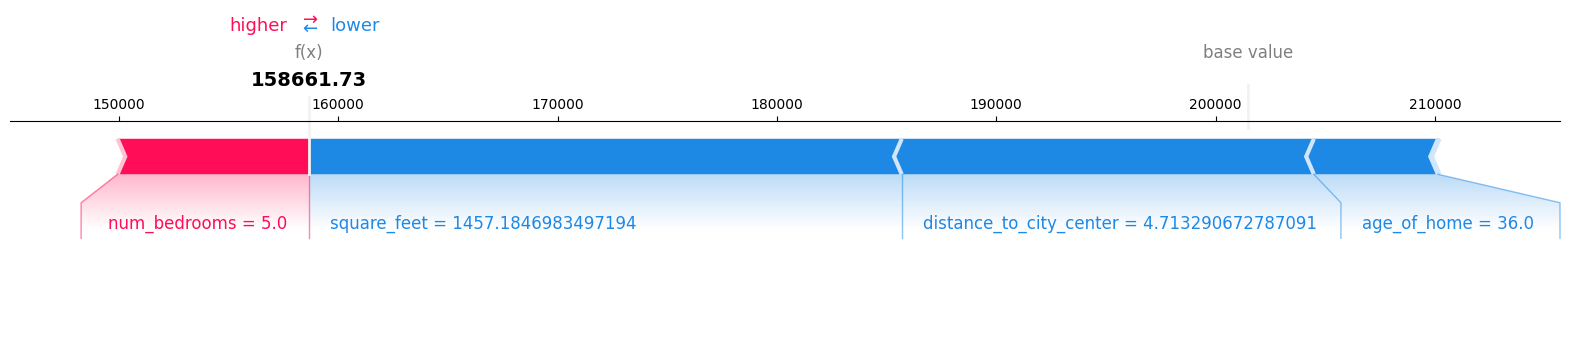

In [23]:
# SHAP Force plot for local explanation
shap.plots.force(
    explainer_xgb.expected_value,
    shap_values_xgb.values[0],
    X.iloc[0],
    matplotlib=True
)

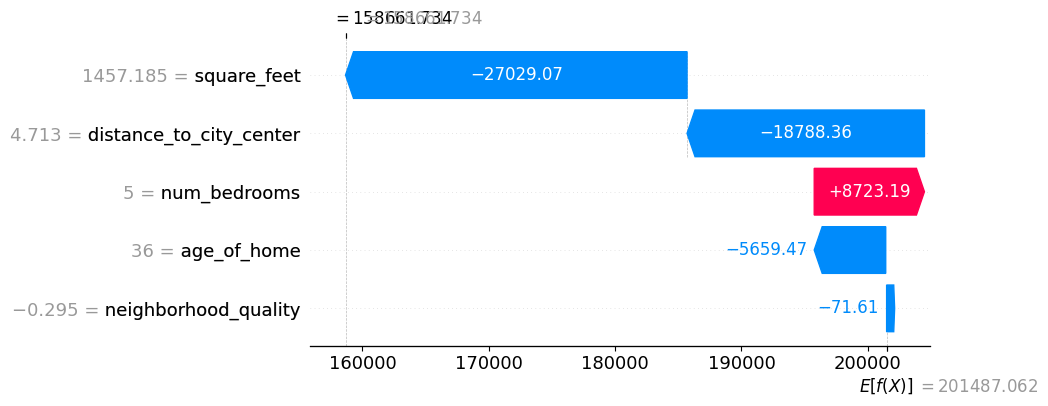

In [24]:
# SHAP Waterfall plot for local explanation
shap.plots.waterfall(shap_values_xgb[0])